
# Hello This parchment Sarcasm, Sarcasm, Sarcasm (meaning the opposite of what is said) to the machine with classification so we'll try to teach the model 

### Merhaba Bu parşata Sarcasm yani Alaycılık , Iğneleme ( söylenen şeyin zıttını kast etme) yi classification ile makinaya ,yani modele öğretmeye çalışacağız 

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

df = pd.read_json("sarcasm.json", lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [3]:
df.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

In [16]:
import warnings 
warnings.filterwarnings('ignore')

'link:',df.iloc[2,:][0],'text:',df.iloc[2,:][1],'is Sarcastic ?:',df.iloc[2,:][2]

('link:',
 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
 'text:',
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'is Sarcastic ?:',
 1)

In [17]:
# Temel amaç yapılan kinayeyi anlaması 

In [19]:
x=df['headline']
y=df['is_sarcastic']

cv = CountVectorizer()

X = cv.fit_transform(x) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
model = BernoulliNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8448146761512542


In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Verileri hazırla
x = df['headline']
y = df['is_sarcastic']

cv = CountVectorizer()
x = cv.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Modeli oluştur
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Modeli derle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğit
model.fit(X_train.toarray(), y_train, epochs=10, batch_size=32, validation_data=(X_test.toarray(), y_test))

Epoch 1/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.7276 - loss: 0.5167 - val_accuracy: 0.8474 - val_loss: 0.3552
Epoch 2/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9172 - loss: 0.2255 - val_accuracy: 0.8399 - val_loss: 0.3766
Epoch 3/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9572 - loss: 0.1224 - val_accuracy: 0.8355 - val_loss: 0.4517
Epoch 4/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9806 - loss: 0.0588 - val_accuracy: 0.8345 - val_loss: 0.5725
Epoch 5/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9896 - loss: 0.0284 - val_accuracy: 0.8366 - val_loss: 0.6673
Epoch 6/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - accuracy: 0.9937 - loss: 0.0198 - val_accuracy: 0.8377 - val_loss: 0.7649
Epoch 7/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9973 - loss: 0.0110 - val_accuracy: 0.8341 - val_loss: 0.8507
Epoch 8/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9985 - loss: 0.0058 - 

167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


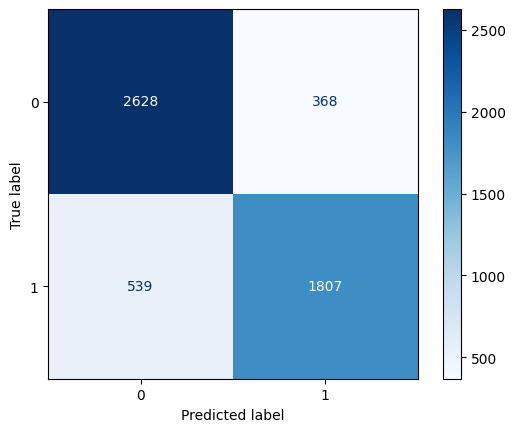

In [24]:
y_pred = (model.predict(X_test.toarray()) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [29]:
from classifi import algo_test as at
df = df[["headline", "is_sarcastic"]]
x = np.array(df["headline"])
y = np.array(df["is_sarcastic"])

cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data
at(X,y)

Veriler hazır modeller deneniyor
BernoulliNB()  modeli eğitiliyor!..
[[4054  390]
 [ 845 2724]]
LogisticRegression()  modeli eğitiliyor!..
[[3884  560]
 [ 687 2882]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[3476  968]
 [1012 2557]]
RandomForestClassifier()  modeli eğitiliyor!..
[[3690  754]
 [ 726 2843]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[3625  819]
 [1165 2404]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[4175  269]
 [2798  771]]
AdaBoostClassifier()  modeli eğitiliyor!..
[[3627  817]
 [1297 2272]]
MultinomialNB()  modeli eğitiliyor!..
[[3977  467]
 [ 733 2836]]
Eğitim tamamlandı.
En başarılı model:  MultinomialNB
Confusion Matrix:
[[3977  467]
 [ 733 2836]]
classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4444
           1       0.86      0.79      0.83      3569

    accuracy                           0.85      8013
   macro avg       0.85      0.84      0.85      8013
weighted

,Accuracy,Precision,Recall,F1
MultinomialNB,0.850243,0.850243,0.850243,0.850243
BernoulliNB,0.845875,0.845875,0.845875,0.845875
LogisticRegression,0.844378,0.844378,0.844378,0.844378
RandomForestClassifier,0.815300,0.815300,0.815300,0.815300
DecisionTreeClassifier,0.752902,0.752902,0.752902,0.752902
GradientBoostingClassifier,0.752402,0.752402,0.752402,0.752402
AdaBoostClassifier,0.736179,0.736179,0.736179,0.736179
KNeighborsClassifier,0.617247,0.617247,0.617247,0.617247


In [31]:
# Deeplearning ile daha yüksek bir sonuç bulduk , modelimiz  Neyin Sarkastik olduğunu gayet iyi bir şekilde analmış oldu 